# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
#from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.regularizers import l2,l1,l1_l2
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [352]:
df = pd.read_csv('./ML_Datasets-main/compresive_strength_concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [354]:
df.describe(percentiles=[0.25,0.5,0.75,0.8,1])

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
80%,376.000000,163.180000,123.000000,195.500000,11.100000,1047.000000,845.000000,56.000000,50.514000
100%,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [355]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

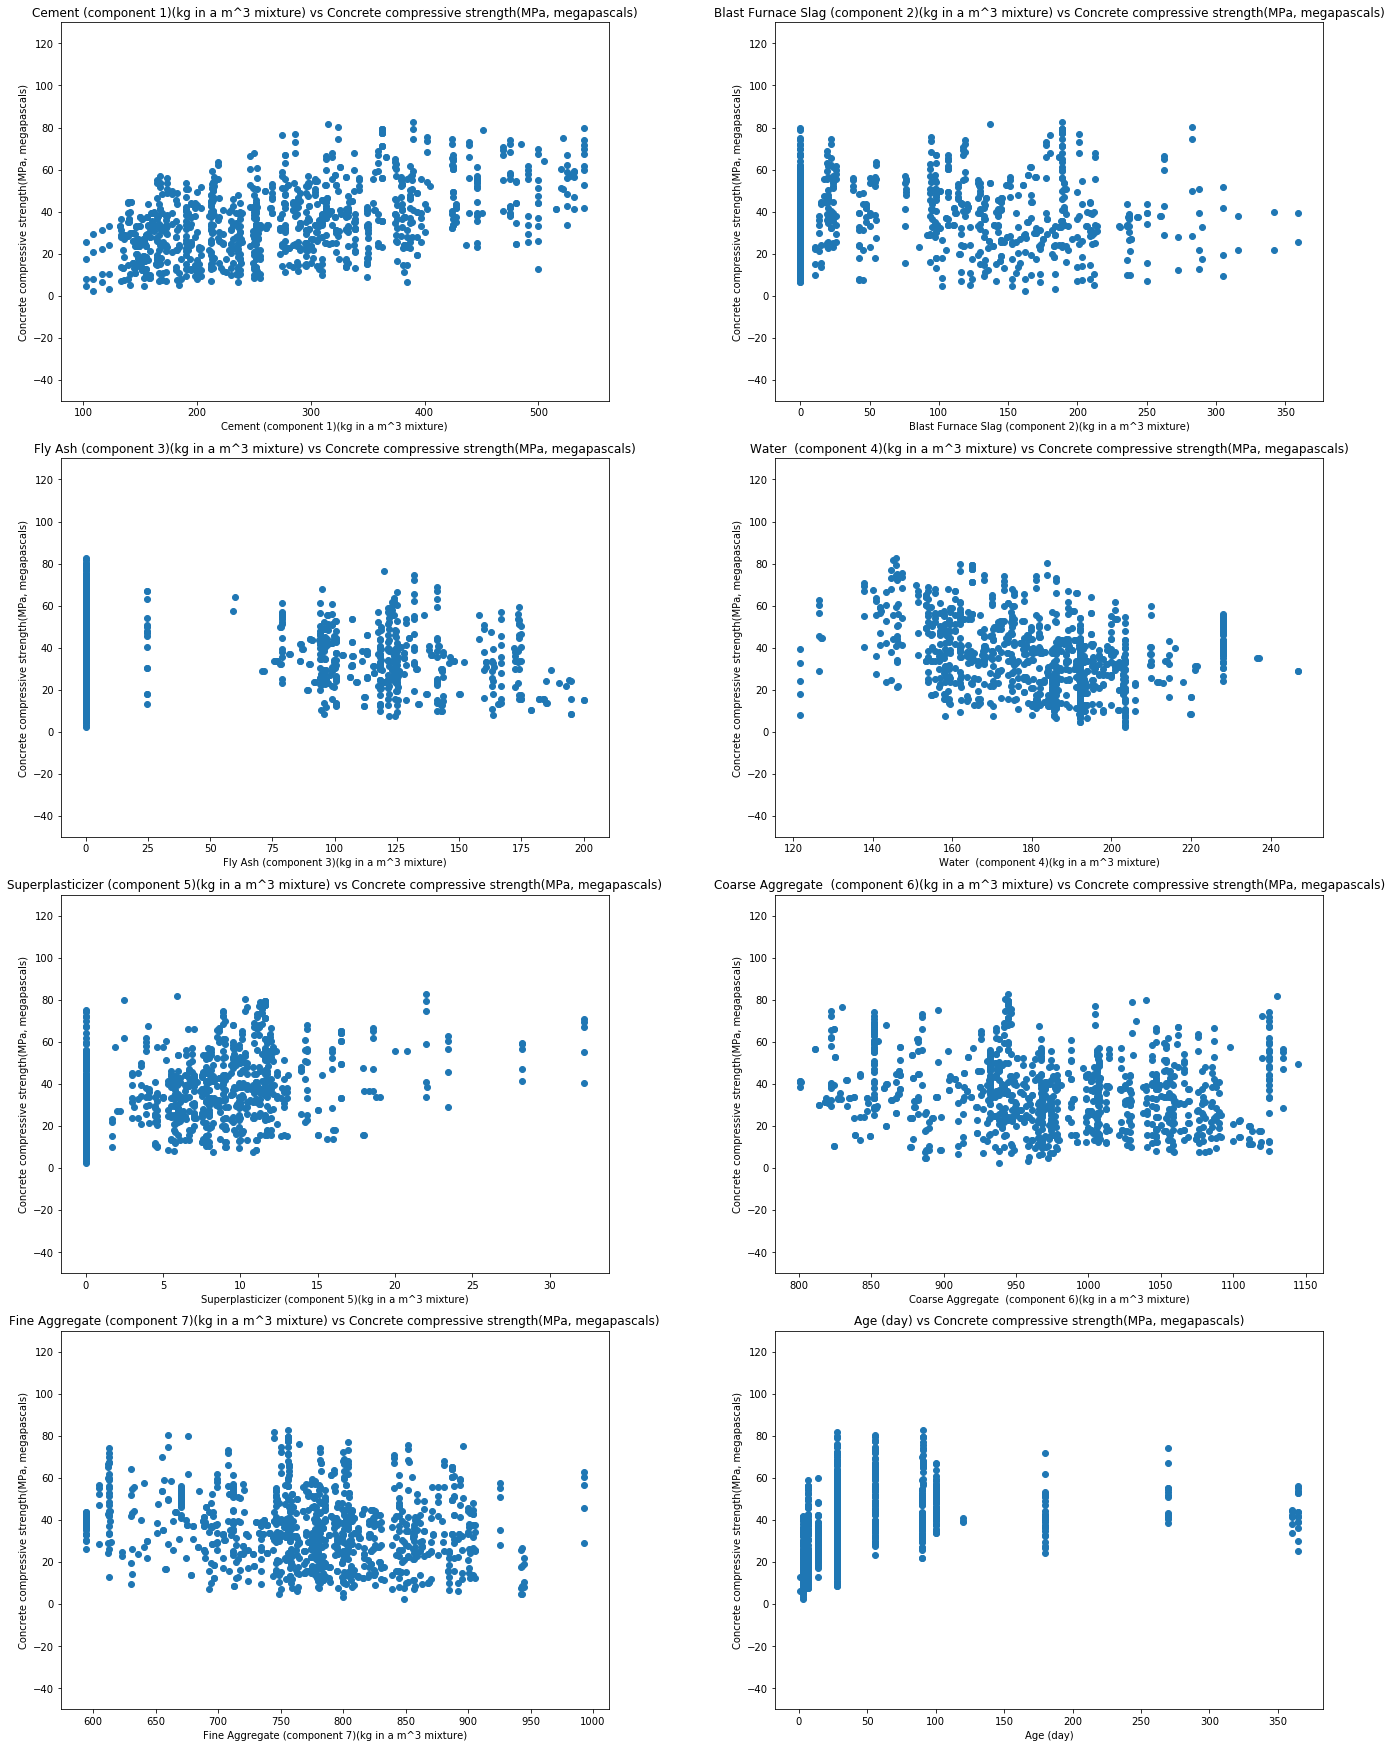

In [356]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Concrete compressive strength(MPa, megapascals) '])
    plt.title(x+' vs Concrete compressive strength(MPa, megapascals)')
    plt.ylabel('Concrete compressive strength(MPa, megapascals)')
    plt.xlabel(x)
    plt.ylim(-50,130)

plt.figure(figsize=(20,30))

scatter('Cement (component 1)(kg in a m^3 mixture)', 1)
scatter('Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 2)
scatter('Fly Ash (component 3)(kg in a m^3 mixture)', 3)
scatter('Water  (component 4)(kg in a m^3 mixture)', 4)
scatter('Superplasticizer (component 5)(kg in a m^3 mixture)', 5)
scatter('Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 6)
scatter('Fine Aggregate (component 7)(kg in a m^3 mixture)',7)
scatter('Age (day)',8)
plt.tight_layout()

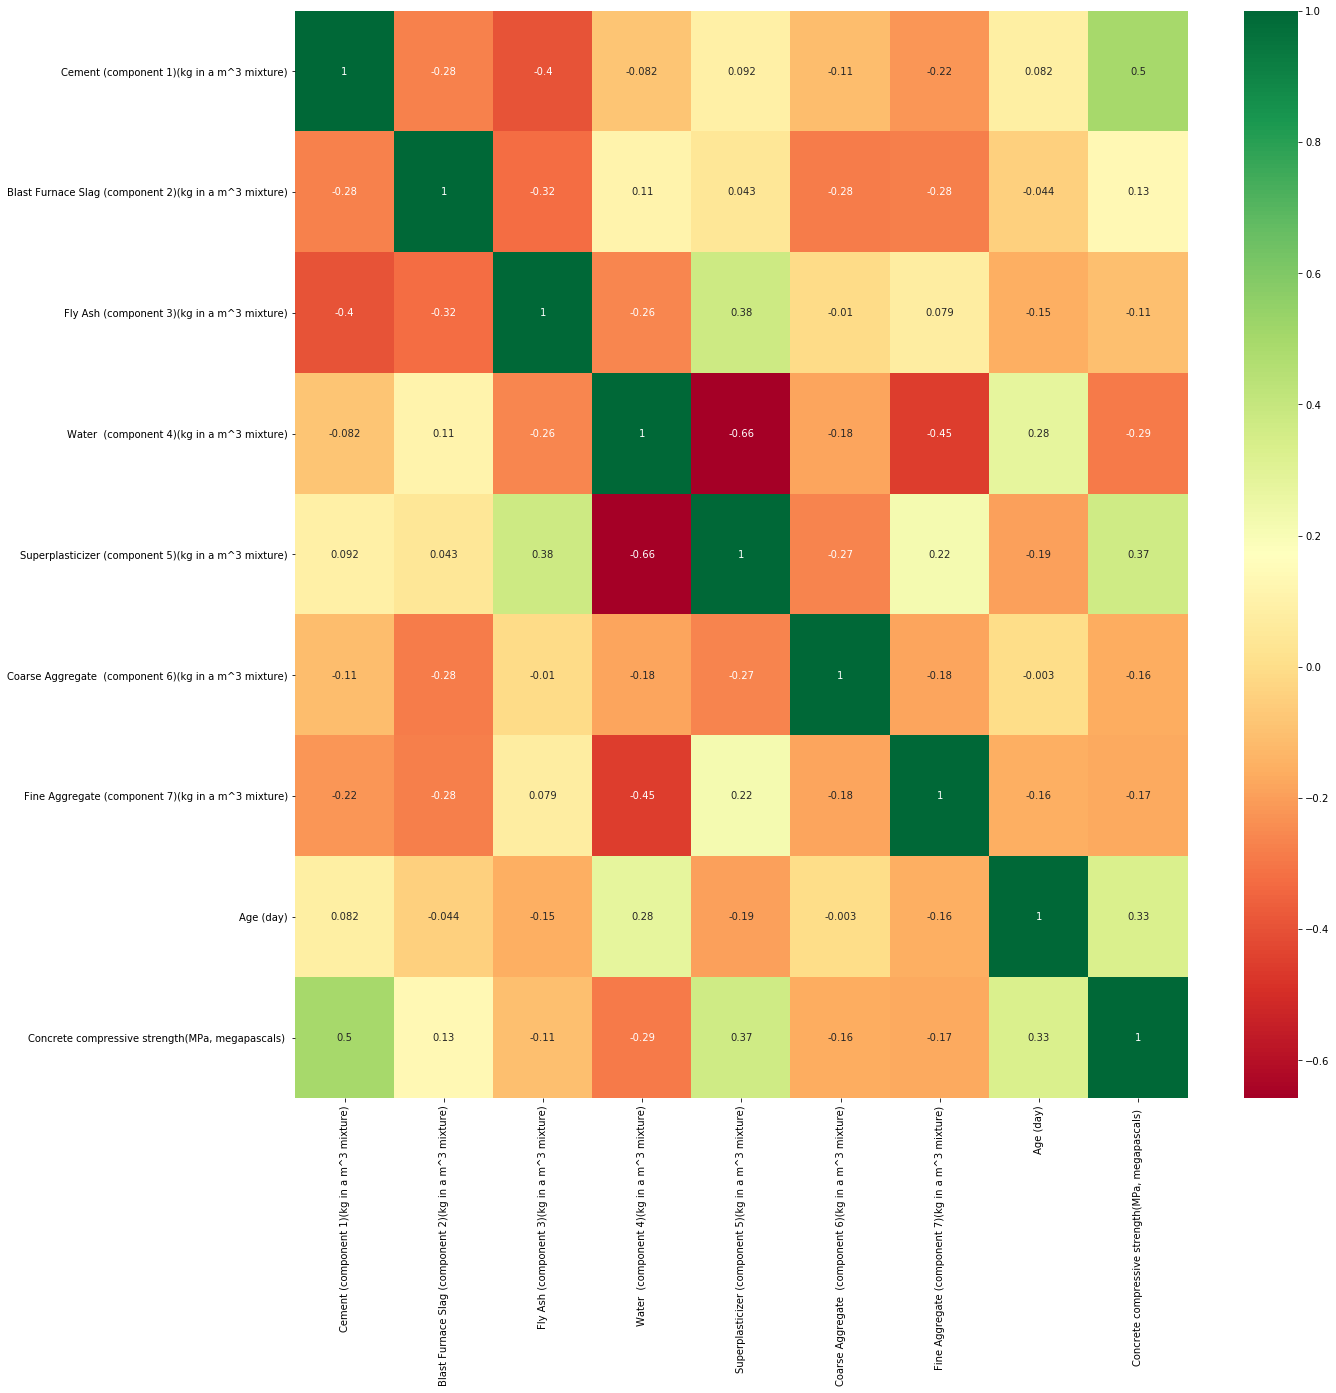

In [357]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(), annot=True,cmap='RdYlGn')

In [358]:
data = df.loc[:,df.columns != 'Concrete compressive strength(MPa, megapascals) ']
targets = df.loc[:,df.columns == 'Concrete compressive strength(MPa, megapascals) ']

In [359]:
train_data,test_data,train_targets,test_targets = train_test_split(data,targets,test_size=0.3,random_state=50)

In [360]:
val_data = train_data[len(train_data)-206:]
val_targets = train_targets[len(train_targets)-206:]

In [361]:
val_targets

,"Concrete compressive strength(MPa, megapascals)"
228,39.23
764,14.70
539,54.32
681,24.28
644,34.29
...,...
1027,23.70
229,18.00
70,34.40
132,71.30


In [362]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
val_data = scaler.transform(val_data)
test_data = scaler.transform(test_data)

train_targets = scaler.fit_transform(train_targets)
val_targets = scaler.transform(val_targets)
test_targets = scaler.transform(test_targets)

In [363]:
train_data.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [364]:
train_data.shape[1]

8

In [365]:
def build_model():
    model = Sequential()
    model.add(Dense(8, activation='relu',input_shape=(train_data.shape[1],),kernel_regularizer=l2(1e-4)))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='tanh'))
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    return model

k=4
num_val_samples = len(train_data) // k
num_epochs = 140
all_scores = []

#num_epochs = 200
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
train_targets = np.asarray(train_targets)
val_data = np.asarray(val_data)
val_targets = np.asarray(val_targets)

In [366]:
model = build_model()
history = model.fit(train_data, train_targets,validation_data=(val_data, val_targets),
                    epochs=140)

Train on 721 samples, validate on 206 samples
Epoch 1/140
721/721 [==============================] - 2s 2ms/sample - loss: 0.1358 - mae: 0.3063 - val_loss: 0.0951 - val_mae: 0.2597
Epoch 2/140
721/721 [==============================] - 0s 167us/sample - loss: 0.0936 - mae: 0.2385 - val_loss: 0.0512 - val_mae: 0.1792
Epoch 3/140
721/721 [==============================] - 0s 164us/sample - loss: 0.0768 - mae: 0.2169 - val_loss: 0.0404 - val_mae: 0.1567
Epoch 4/140
721/721 [==============================] - 0s 165us/sample - loss: 0.0663 - mae: 0.1989 - val_loss: 0.0382 - val_mae: 0.1526
Epoch 5/140
721/721 [==============================] - 0s 173us/sample - loss: 0.0645 - mae: 0.1970 - val_loss: 0.0369 - val_mae: 0.1503
Epoch 6/140
721/721 [==============================] - 0s 163us/sample - loss: 0.0622 - mae: 0.1934 - val_loss: 0.0376 - val_mae: 0.1518
Epoch 7/140
721/721 [==============================] - 0s 167us/sample - loss: 0.0613 - mae: 0.1955 - val_loss: 0.0361 - val_mae: 0.14

721/721 [==============================] - 0s 151us/sample - loss: 0.0226 - mae: 0.1122 - val_loss: 0.0159 - val_mae: 0.0974
Epoch 120/140
721/721 [==============================] - 0s 144us/sample - loss: 0.0201 - mae: 0.1072 - val_loss: 0.0157 - val_mae: 0.0963
Epoch 121/140
721/721 [==============================] - 0s 146us/sample - loss: 0.0212 - mae: 0.1110 - val_loss: 0.0160 - val_mae: 0.0969
Epoch 122/140
721/721 [==============================] - 0s 145us/sample - loss: 0.0222 - mae: 0.1142 - val_loss: 0.0153 - val_mae: 0.0953
Epoch 123/140
721/721 [==============================] - 0s 156us/sample - loss: 0.0189 - mae: 0.1048 - val_loss: 0.0158 - val_mae: 0.0981
Epoch 124/140
721/721 [==============================] - 0s 162us/sample - loss: 0.0205 - mae: 0.1111 - val_loss: 0.0154 - val_mae: 0.0951
Epoch 125/140
721/721 [==============================] - 0s 158us/sample - loss: 0.0201 - mae: 0.1082 - val_loss: 0.0152 - val_mae: 0.0952
Epoch 126/140
721/721 [==================

In [367]:
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [368]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [369]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history[-1]

0.10125307

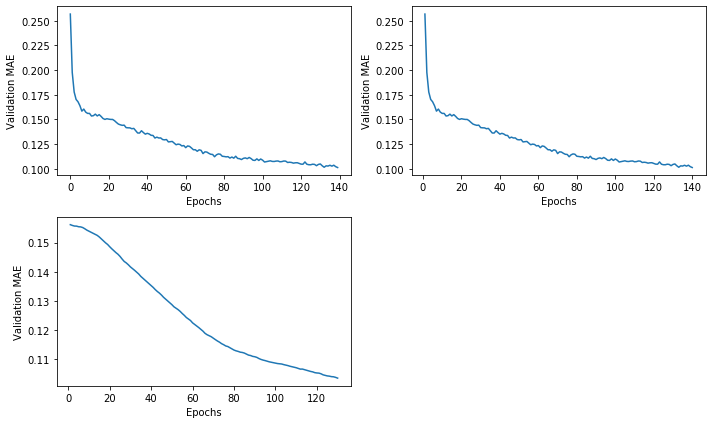

In [370]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.subplot(2,2,2)
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.subplot(2,2,3)
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')

plt.tight_layout()
plt.show()

def build_model1():
    model = Sequential()
    model.add(Dense(6, activation='relu',input_shape=(train_data.shape[1],),kernel_regularizer=l2(0.01)))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='Adam', loss='mse', metrics=['mae'])
    return model

model = build_model1()
history = model.fit(train_data, train_targets,
          epochs=120, batch_size=64, verbose=1)
test_targets = np.asarray(test_targets)

In [371]:
test_targets = np.asarray(test_targets)
test_data = np.asarray(test_data)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

309/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [372]:
print(test_mse_score, test_mae_score)

0.012125165810549336 0.085218415


In [373]:
scaled = model.predict(test_data)
scaled

array([[0.57790095],
       [0.24315982],
       [0.51516664],
       [0.28720355],
       [0.22250536],
       [0.47909704],
       [0.50206614],
       [0.4072945 ],
       [0.28076085],
       [0.22982146],
       [0.4306561 ],
       [0.2808892 ],
       [0.2765685 ],
       [0.5006506 ],
       [0.2827219 ],
       [0.28736272],
       [0.48713768],
       [0.467355  ],
       [0.42445272],
       [0.22504325],
       [0.48235786],
       [0.2153634 ],
       [0.25733843],
       [0.55836123],
       [0.45987284],
       [0.24751624],
       [0.37353975],
       [0.40868944],
       [0.23458676],
       [0.5287959 ],
       [0.30157578],
       [0.48691446],
       [0.26131734],
       [0.24821073],
       [0.4945654 ],
       [0.49868706],
       [0.6197898 ],
       [0.5381495 ],
       [0.6106889 ],
       [0.48190582],
       [0.2696579 ],
       [0.378799  ],
       [0.3116711 ],
       [0.6976222 ],
       [0.29601526],
       [0.5907771 ],
       [0.33362812],
       [0.398